Import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

Load data

In [43]:
df = pd.read_csv('sierraleone-bumbuna.csv')

In [44]:
# The fist few rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Summary Statistics & Missing-Value Report

In [45]:
# statistical summary
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [46]:
# missing values
missing_values= df.isna().sum()
print("Missing values ", missing_values )

Missing values  Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [47]:
# Columns with >5% nulls
threshold = 0.05 * len(df)
high_missing = missing_values[missing_values > threshold]
print("Columns with > 5% missing values:\n", high_missing)

Columns with > 5% missing values:
 Comments    525600
dtype: int64


In [48]:
# Outlier Detection & Basic Cleaning
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Z-score
z_scores = df[columns_to_check].apply(stats.zscore)


In [49]:
#  Outliers where |Z| > 3
outliers = (np.abs(z_scores) > 3)
print("Outliers in each column:\n", outliers.sum())

Outliers in each column:
 GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


In [50]:
# Drop outliers
df_clean = df[~(outliers.any(axis=1))].copy()

In [51]:
# Impute missing values in key columns
for col in columns_to_check:
    if df_clean[col].isna().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

In [52]:
print(df_clean.columns.tolist())

['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [53]:
# Export Cleaned Data
os.makedirs('data', exist_ok=True)
df_clean.to_csv('data/sierraleone_clean.csv', index=False)

Time Series Analysis

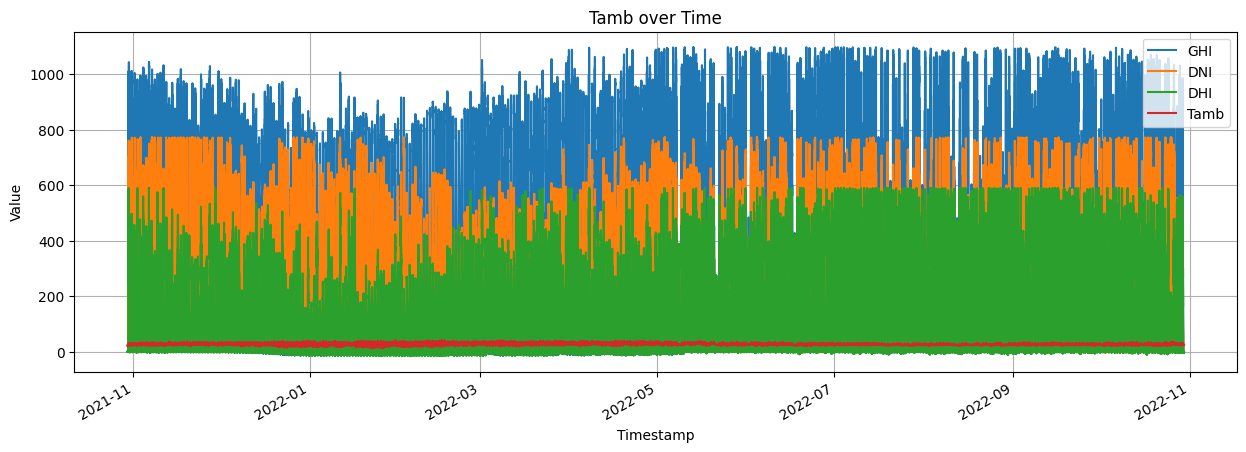

In [54]:
# Parse timestamp
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Set index
df_clean.set_index('Timestamp', inplace=True)

# Plot
df_clean[['GHI', 'DNI', 'DHI','Tamb']].plot(figsize=(15,5))
plt.title("Tamb over Time")
plt.ylabel("Value")
plt.grid()
plt.show()


In [55]:
print(df_clean.columns.tolist())

['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


Cleaning Impact

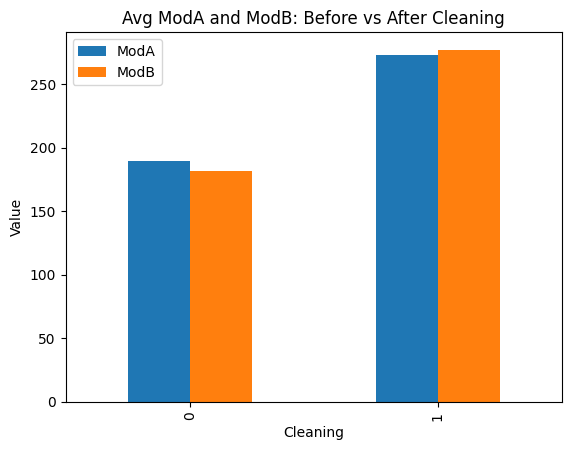

In [56]:
df_clean['Cleaning'] = df_clean['Cleaning'].astype(str)  # Convert to string for plot
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Avg ModA and ModB: Before vs After Cleaning')
plt.ylabel('Value')
plt.show()


Correlation & Relationship Analysis

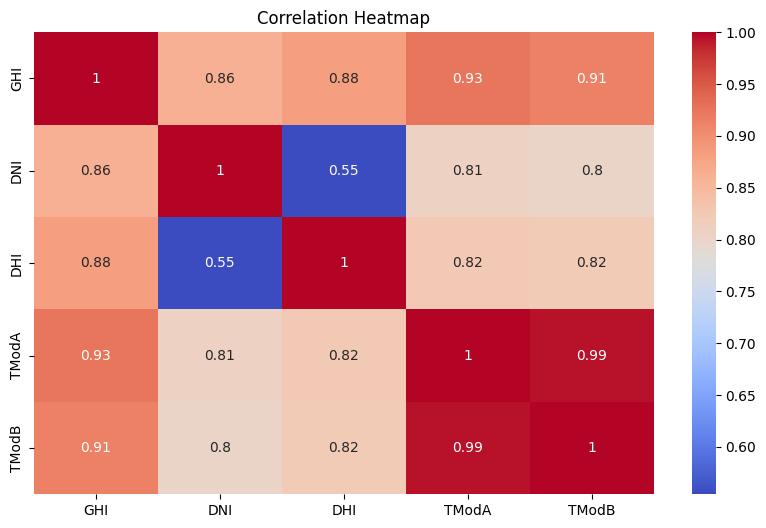

In [57]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


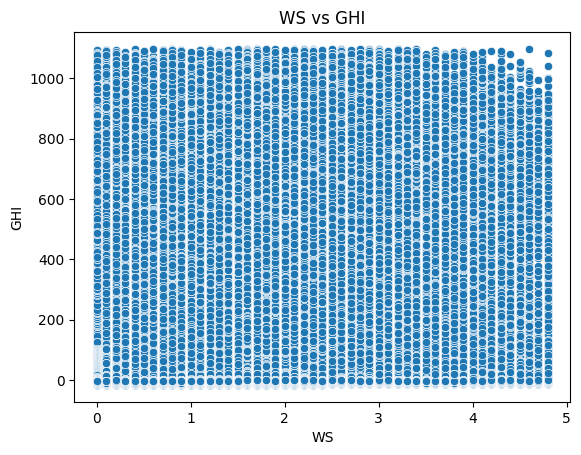

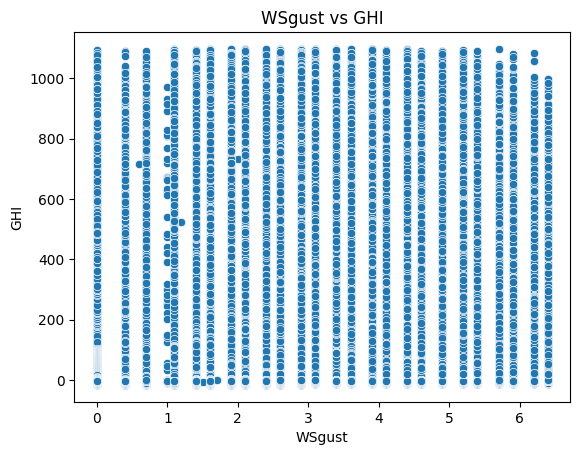

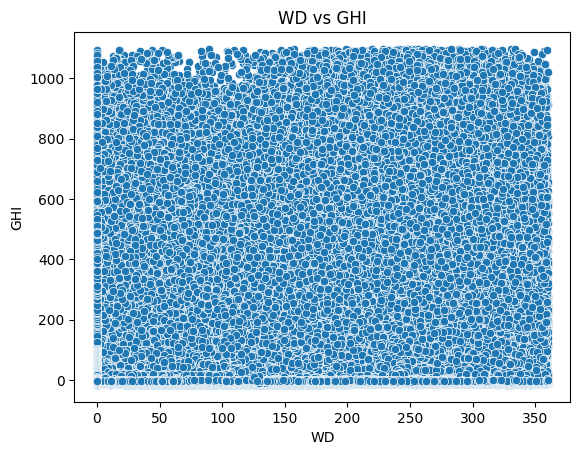

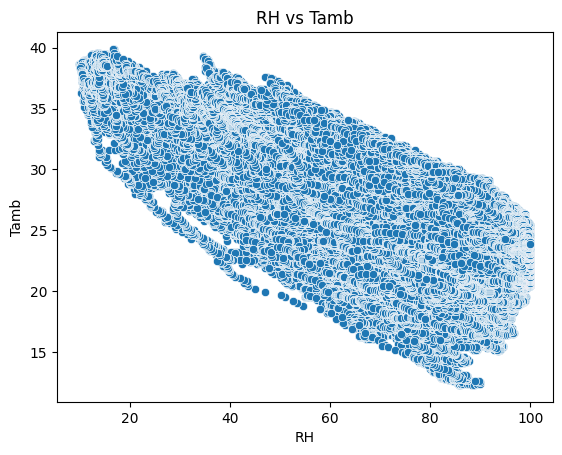

In [58]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("WS vs GHI")
plt.show()

sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title("WSgust vs GHI")
plt.show()

sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title("WD vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("RH vs Tamb")
plt.show()


Wind & Distribution Analysis

C:\Users\girmachewgulint\AppData\Local\Temp\ipykernel_9876\3902681573.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


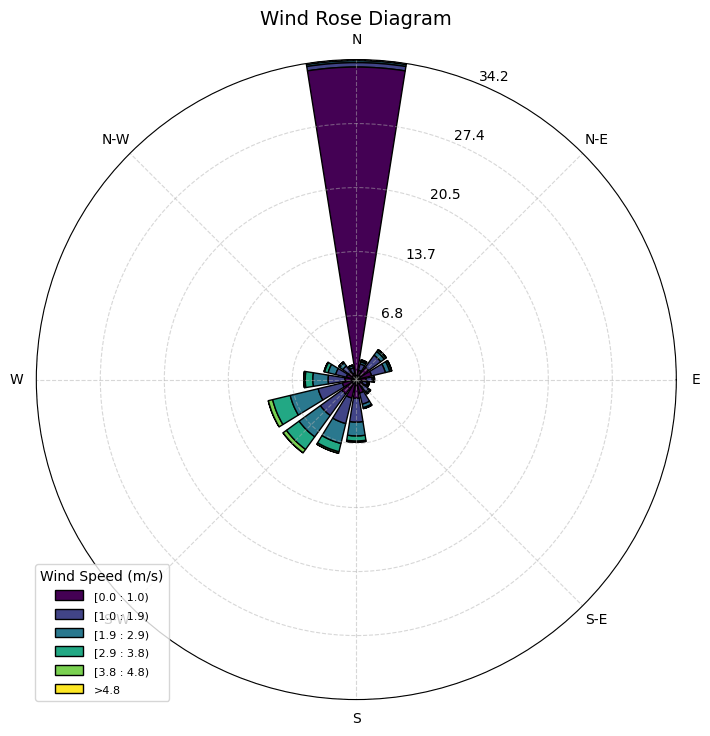

In [59]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm

# Create figure and windrose axes
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

# Plot wind rose using bar style with improved colormap
ax.bar(
    df_clean['WD'],                # Wind direction (in degrees)
    df_clean['WS'],                # Wind speed (in m/s)
    normed=True,
    opening=0.8,
    edgecolor='black',            # Better contrast
    cmap=cm.viridis               # Modern, perceptually uniform colormap
)

# Add and customize legend
ax.set_legend(
    title='Wind Speed (m/s)',
    loc='lower left',
    frameon=True,
    fontsize=10
)

# Add grid and title
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Wind Rose Diagram", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


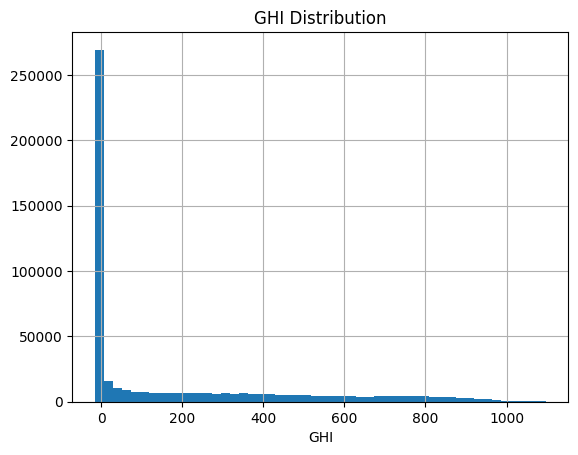

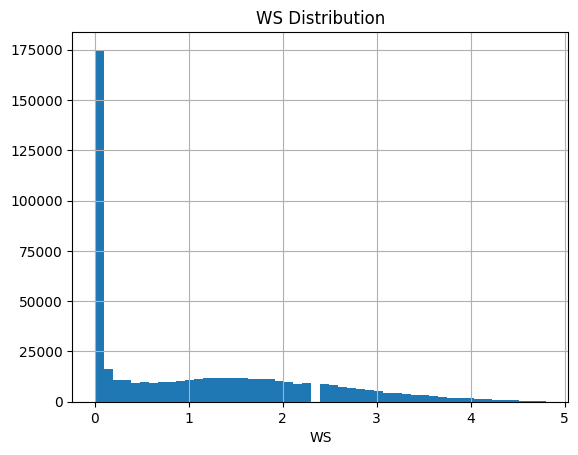

In [60]:
# Histogram
df_clean['GHI'].hist(bins=50)
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.show()

df_clean['WS'].hist(bins=50)
plt.title('WS Distribution')
plt.xlabel('WS')
plt.show()
